# SPOTIFY: AI-POWERED NLP FOR THE ULTIMATE MUSIC LISTENING EXPERIENCE

In [23]:
import os
import numpy as np
import pandas as pd
import glob
import re


import seaborn as sns
import plotly.express as px 
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

In [128]:
spotify = pd.read_csv(r"C:\Users\ashiv\OneDrive\Documents\Meachine Learning Projects Real Time\spotify-2023.csv", encoding='latin1')
spotify.head()

,track_name,artist(s)_name,artist_count,released_year,released_month,released_day,in_spotify_playlists,in_spotify_charts,streams,in_apple_playlists,...,bpm,key,mode,danceability_%,valence_%,energy_%,acousticness_%,instrumentalness_%,liveness_%,speechiness_%
0,Seven (feat. Latto) (Explicit Ver.),"Latto, Jung Kook",2,2023,7,14,553,147,141381703,43,...,125,B,Major,80,89,83,31,0,8,4
1,LALA,Myke Towers,1,2023,3,23,1474,48,133716286,48,...,92,C#,Major,71,61,74,7,0,10,4
2,vampire,Olivia Rodrigo,1,2023,6,30,1397,113,140003974,94,...,138,F,Major,51,32,53,17,0,31,6
3,Cruel Summer,Taylor Swift,1,2019,8,23,7858,100,800840817,116,...,170,A,Major,55,58,72,11,0,11,15
4,WHERE SHE GOES,Bad Bunny,1,2023,5,18,3133,50,303236322,84,...,144,A,Minor,65,23,80,14,63,11,6


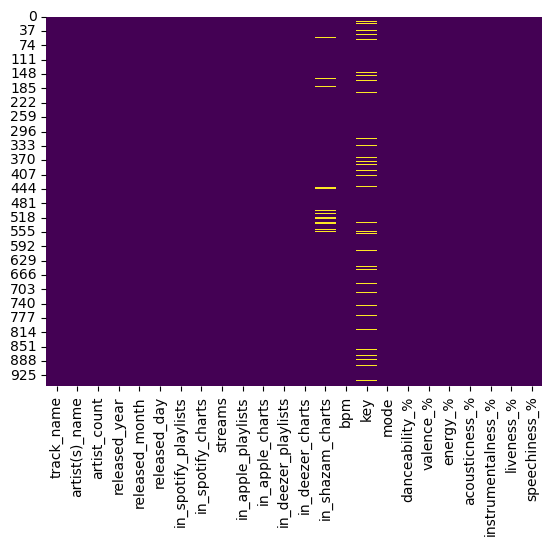

In [4]:
sns.heatmap(spotify.isnull(), cbar=False, cmap='viridis')
plt.show()

There are two columns where the null values is more so I am dropping the "Key" columns as it has the most of the null values.

In [8]:
spotify.drop('key', axis=1, inplace=True)

In [9]:
null = spotify.isnull().sum()
null

track_name               0
artist(s)_name           0
artist_count             0
released_year            0
released_month           0
released_day             0
in_spotify_playlists     0
in_spotify_charts        0
streams                  0
in_apple_playlists       0
in_apple_charts          0
in_deezer_playlists      0
in_deezer_charts         0
in_shazam_charts        50
bpm                      0
mode                     0
danceability_%           0
valence_%                0
energy_%                 0
acousticness_%           0
instrumentalness_%       0
liveness_%               0
speechiness_%            0
dtype: int64

In [10]:
pearson_corr = spotify.corr(method='pearson')

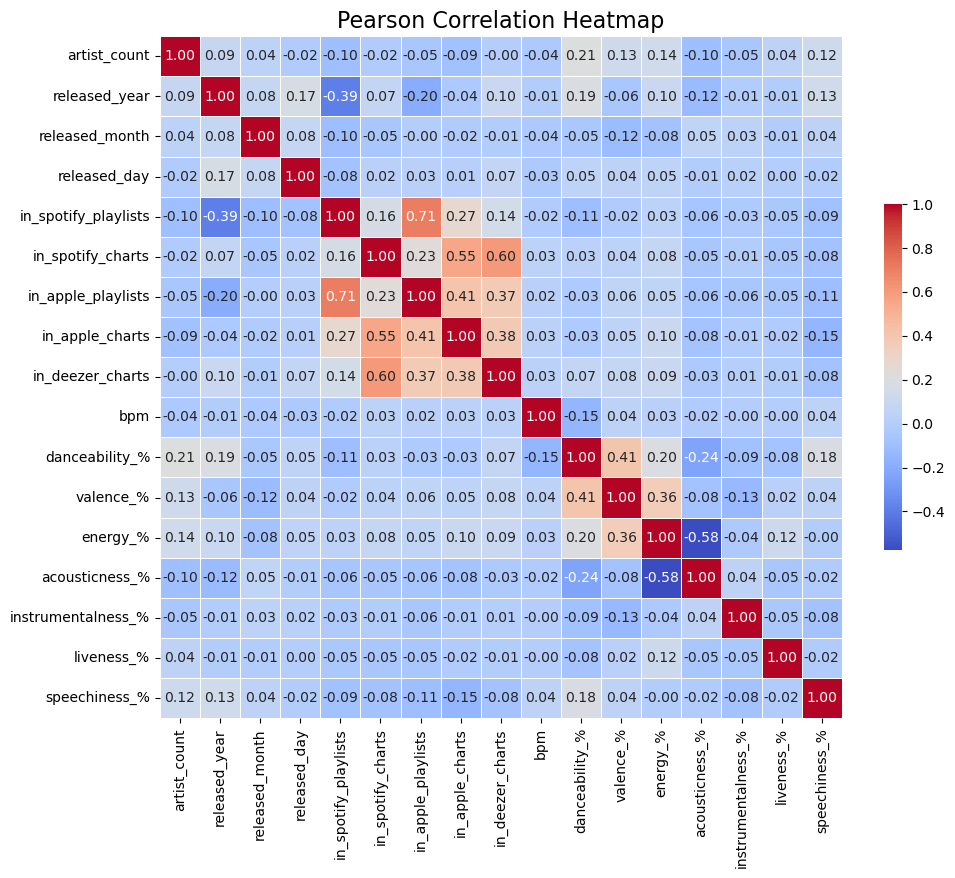

In [11]:
plt.figure(figsize=(11, 9))

sns.heatmap(pearson_corr, annot=True, fmt='.2f', cmap='coolwarm', 
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

plt.title('Pearson Correlation Heatmap', fontsize=16)

plt.show()

Plotting correlation heat map to find some correlation not much information from this heat map , there are some correlation I found which are positve.

In [12]:
spotify.columns

Index(['track_name', 'artist(s)_name', 'artist_count', 'released_year',
       'released_month', 'released_day', 'in_spotify_playlists',
       'in_spotify_charts', 'streams', 'in_apple_playlists', 'in_apple_charts',
       'in_deezer_playlists', 'in_deezer_charts', 'in_shazam_charts', 'bpm',
       'mode', 'danceability_%', 'valence_%', 'energy_%', 'acousticness_%',
       'instrumentalness_%', 'liveness_%', 'speechiness_%'],
      dtype='object')

The above code give the distribution of the selected coloumn these is to get the idea of how the numerical values are distributed.

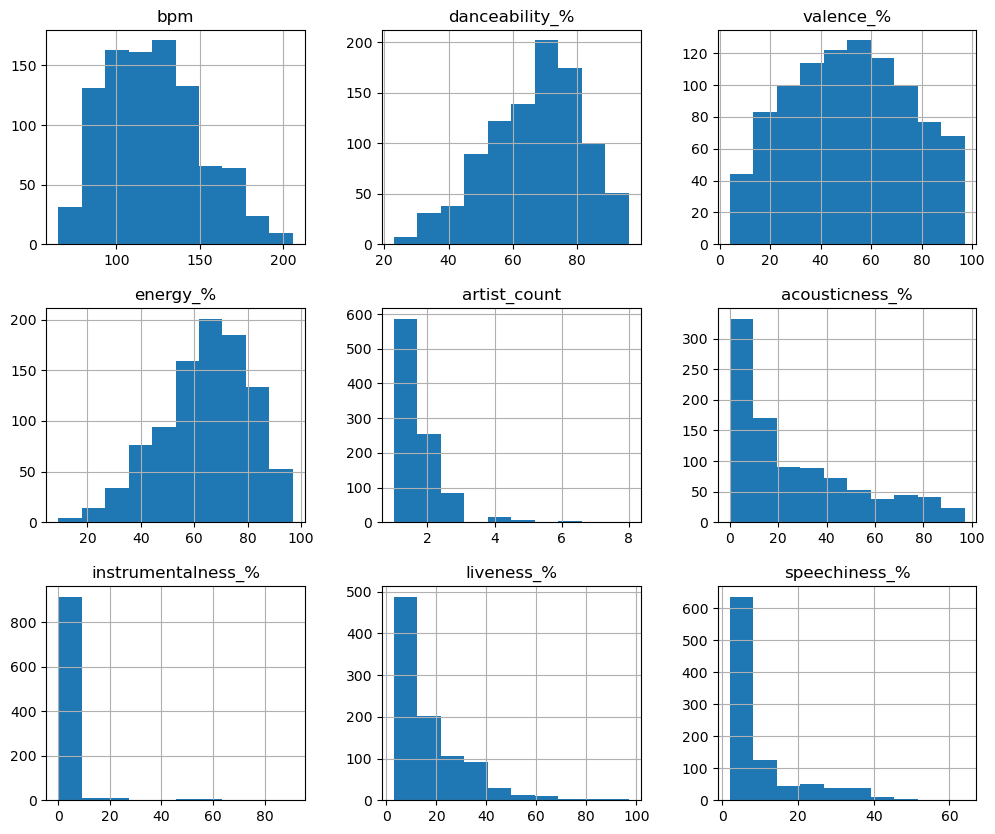

In [13]:
spotify[['streams', 'bpm', 'danceability_%', 'valence_%', 'energy_%', 'artist_count',
         'acousticness_%', 'instrumentalness_%', 'liveness_%', 'speechiness_%']].hist(figsize=(12, 10))
plt.show()

### Lets find out the top 10 artist by number of songs

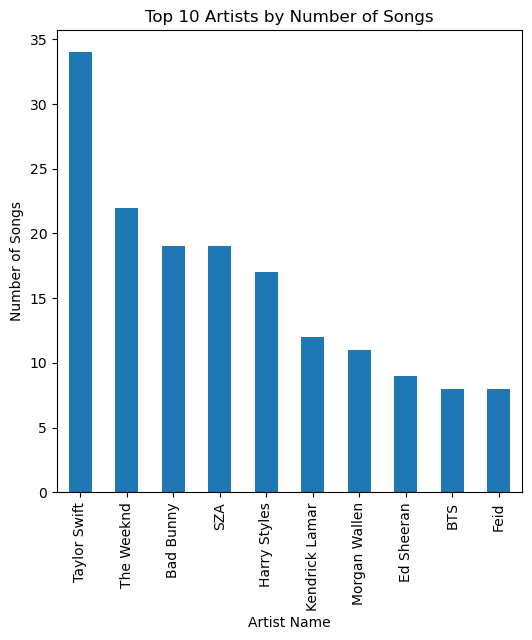

In [14]:
top_artists = spotify['artist(s)_name'].value_counts().head(10)
top_artists.plot(kind='bar', figsize=(6, 6))
plt.title('Top 10 Artists by Number of Songs')
plt.xlabel('Artist Name')
plt.ylabel('Number of Songs')
plt.show()

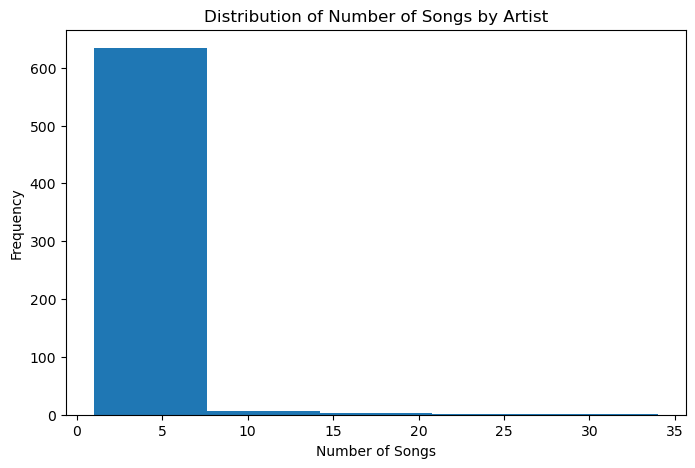

In [11]:
songs_per_artist = spotify['artist(s)_name'].value_counts()
songs_per_artist.plot(kind='hist', bins=5, figsize=(8, 5))
plt.title('Distribution of Number of Songs by Artist')
plt.xlabel('Number of Songs')
plt.ylabel('Frequency')
plt.show()

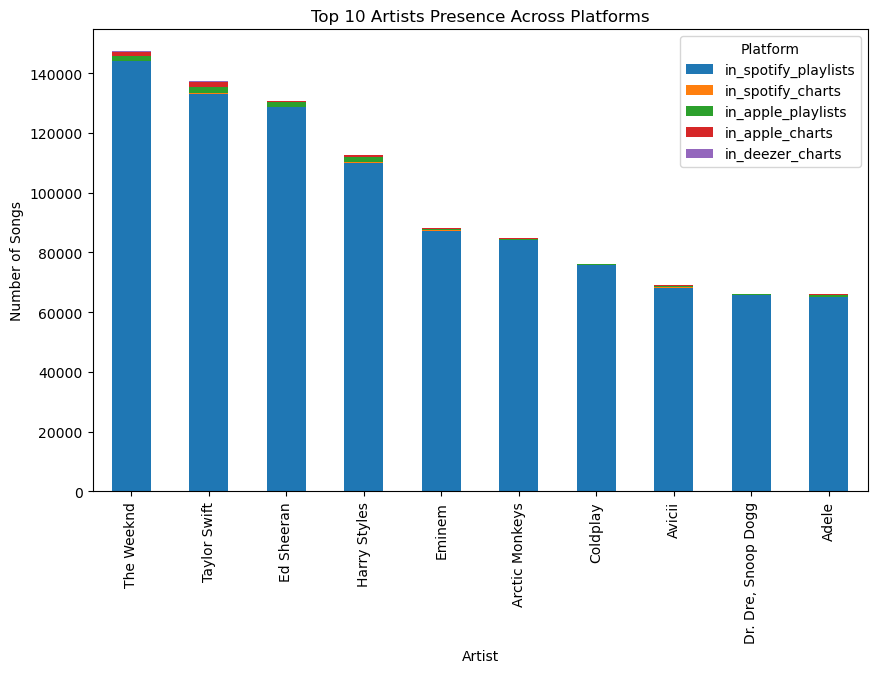

In [13]:
platform_columns = ['in_spotify_playlists', 'in_spotify_charts', 'in_apple_playlists', 
                    'in_apple_charts', 'in_deezer_playlists', 'in_deezer_charts']

platform_presence = spotify.groupby('artist(s)_name')[platform_columns].sum()
top_artists_platform_presence = platform_presence.loc[platform_presence.sum(axis=1).sort_values(ascending=False).head(10).index]

top_artists_platform_presence.plot(kind='bar', stacked=True, figsize=(10, 6))
plt.title('Top 10 Artists Presence Across Platforms')
plt.xlabel('Artist')
plt.ylabel('Number of Songs')
plt.legend(title='Platform')
plt.show()

In [14]:
platform_columns = ['in_spotify_playlists', 'in_spotify_charts', 
                    'in_apple_playlists', 'in_apple_charts', 
                    'in_deezer_playlists', 'in_deezer_charts']

platform_presence = spotify.groupby('artist(s)_name')[platform_columns].sum()

top_artists = platform_presence.sum(axis=1).sort_values(ascending=False).head(10).index

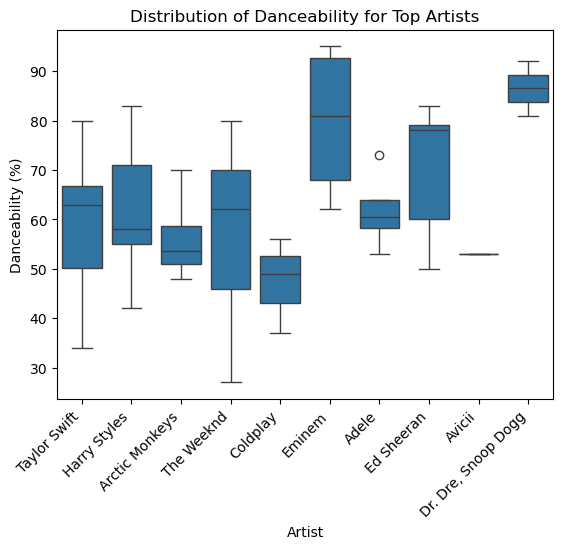

In [15]:
sns.boxplot(data=spotify[spotify['artist(s)_name'].isin(top_artists)], x='artist(s)_name', y='danceability_%')
plt.title('Distribution of Danceability for Top Artists')
plt.xlabel('Artist')
plt.ylabel('Danceability (%)')
plt.xticks(rotation=45, ha='right')
plt.show()

Eminem , Snoop Dog has the mean average for dancebality which make sense given the popularity of there songs.

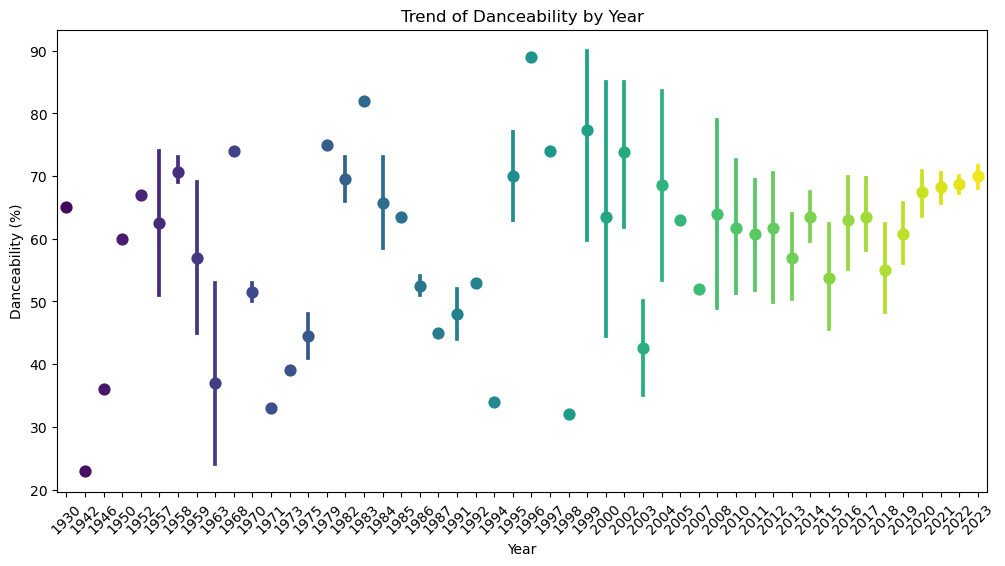

In [16]:
plt.figure(figsize=(12, 6))
sns.pointplot(data=spotify, x='released_year', y='danceability_%', palette='viridis')
plt.title('Trend of Danceability by Year')
plt.xlabel('Year')
plt.ylabel('Danceability (%)')
plt.xticks(rotation=45)
plt.show()

### Number of Releases by Day of the week

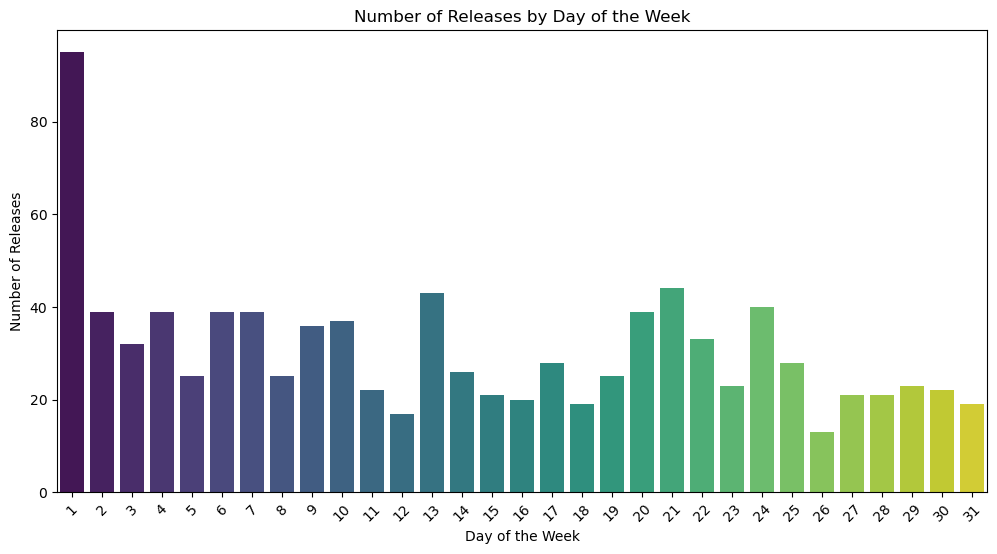

In [17]:
plt.figure(figsize=(12, 6))
sns.countplot(data=spotify, x='released_day', palette='viridis')
plt.title('Number of Releases by Day of the Week')
plt.xlabel('Day of the Week')
plt.ylabel('Number of Releases')
plt.xticks(rotation=45)
plt.show()

In [ ]:
pip install wordcloud

In [130]:
from collections import Counter
from wordcloud import WordCloud

In [131]:
all_track_names = ' '.join(spotify['track_name'].dropna().values)

word_counts = Counter(all_track_names.split())

word_counts_df = pd.DataFrame(word_counts.items(), columns=['word', 'count']).sort_values(by='count', ascending=False)

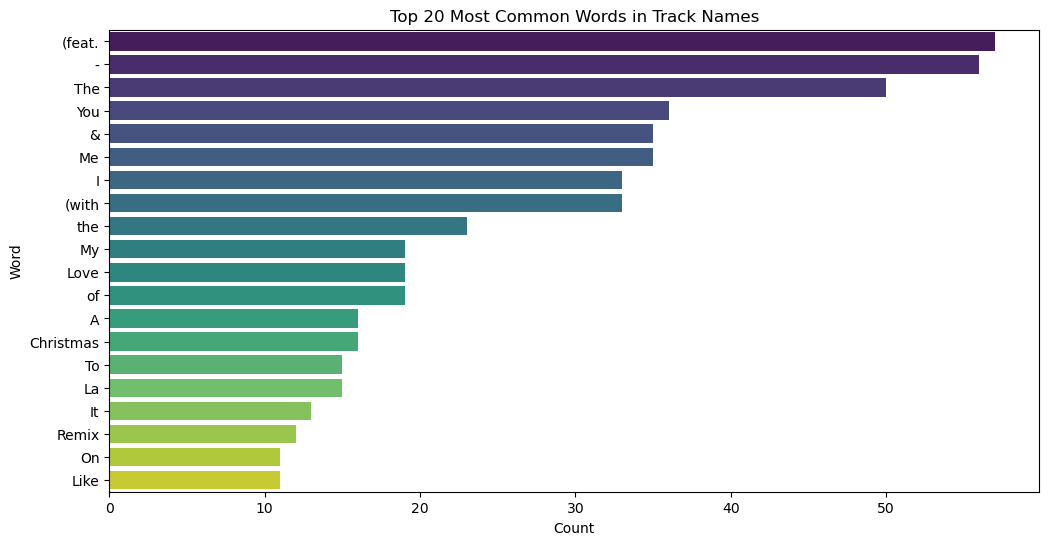

In [20]:
plt.figure(figsize=(12, 6))
sns.barplot(data=word_counts_df.head(20), x='count', y='word', palette='viridis')
plt.title('Top 20 Most Common Words in Track Names')
plt.xlabel('Count')
plt.ylabel('Word')
plt.show()

In [21]:
spotify['track_name_length'] = spotify['track_name'].apply(lambda x: len(x) if pd.notnull(x) else 0)

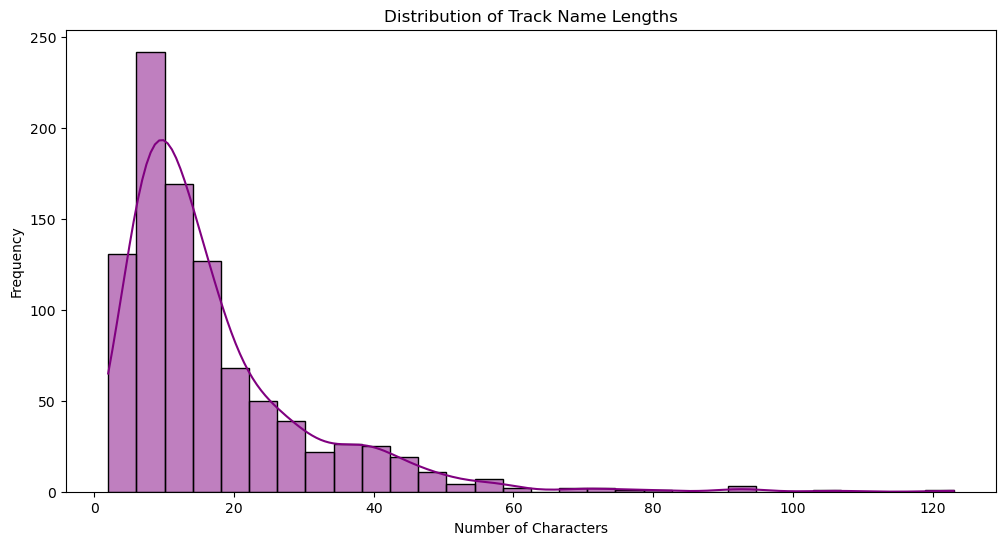

In [22]:
plt.figure(figsize=(12, 6))
sns.histplot(data=spotify, x='track_name_length', bins=30, kde=True, color='purple')
plt.title('Distribution of Track Name Lengths')
plt.xlabel('Number of Characters')
plt.ylabel('Frequency')
plt.show()

In [23]:
spotify['track_name_word_count'] = spotify['track_name'].apply(lambda x: len(str(x).split()) if pd.notnull(x) else 0)


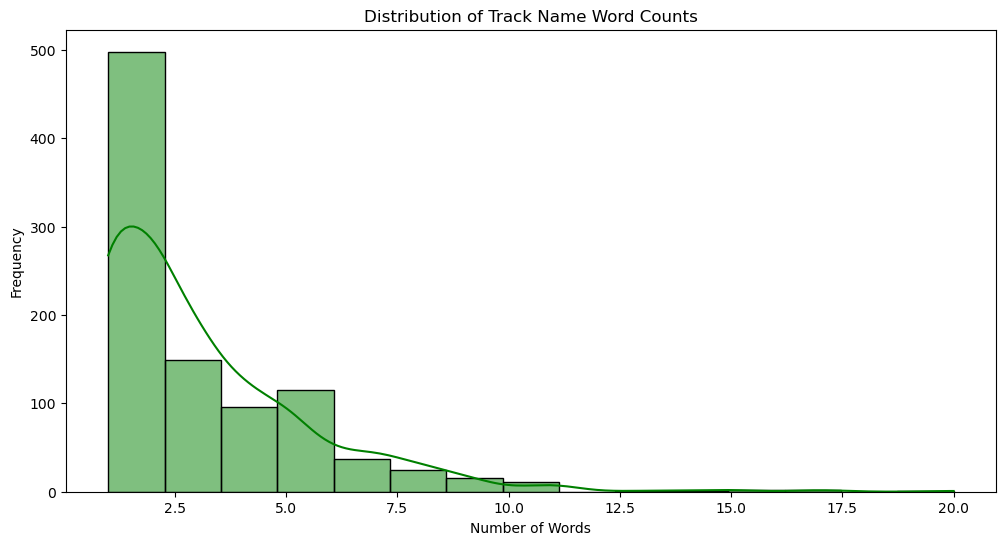

In [24]:
plt.figure(figsize=(12, 6))
sns.histplot(data=spotify, x='track_name_word_count', bins=15, kde=True, color='green')
plt.title('Distribution of Track Name Word Counts')
plt.xlabel('Number of Words')
plt.ylabel('Frequency')
plt.show()

In [25]:
unique_track_names_count = spotify['track_name'].nunique()
print(f'Number of Unique Track Names: {unique_track_names_count}')

Number of Unique Track Names: 943


In [133]:
import nltk
from nltk.tokenize import word_tokenize

In [27]:
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\ashiv\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [134]:
spotify['track_name_tokens'] = spotify['track_name'].apply(lambda x: word_tokenize(str(x).lower()) if pd.notnull(x) else [])


In [135]:
all_tokens = [token for sublist in spotify['track_name_tokens'] for token in sublist]

In [136]:
prefix_counts = Counter([token[:5] for token in all_tokens if len(token) > 3])

In [137]:
prefix_counts_df = pd.DataFrame(prefix_counts.items(), columns=['prefix', 'count']).sort_values(by='count', ascending=False)


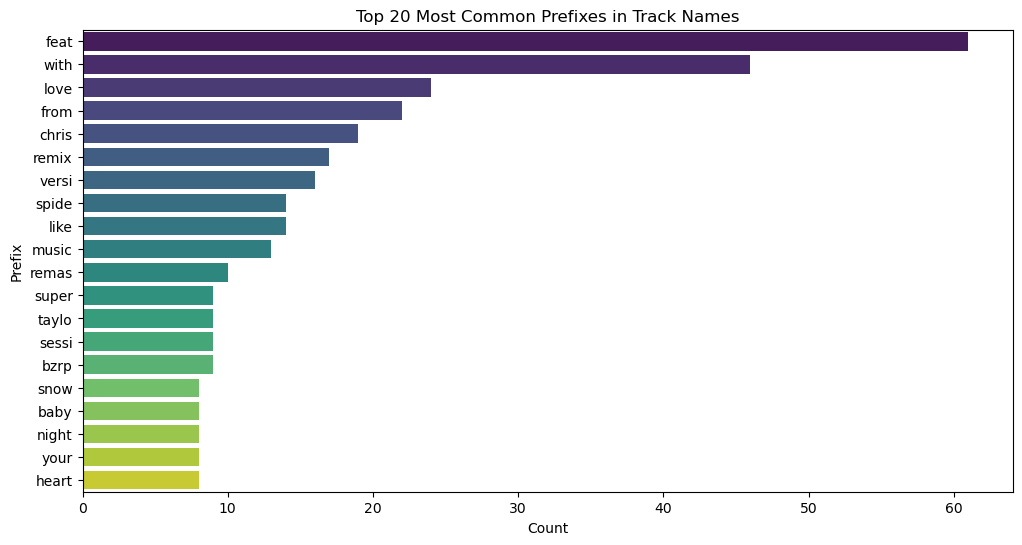

In [138]:
plt.figure(figsize=(12, 6))
sns.barplot(data=prefix_counts_df.head(20), x='count', y='prefix', palette='viridis')
plt.title('Top 20 Most Common Prefixes in Track Names')
plt.xlabel('Count')
plt.ylabel('Prefix')
plt.show()

In [32]:
unique_artists = spotify['artist(s)_name'].unique()


In [29]:
def preprocess_artist_name(artist_name):
    # Convert to lowercase
    artist_name = artist_name.lower()
    
    # Remove special characters like ï½ï½
    artist_name = re.sub(r'[^\x00-\x7F]+', '', artist_name)
    
    # Remove extra spaces
    artist_name = re.sub(r'\s+', ' ', artist_name).strip()
    
    # Remove any remaining non-word characters except commas
    artist_name = re.sub(r'[^\w\s,]', '', artist_name)
    
    # Split by comma and strip spaces around each part
    artist_name_parts = [part.strip() for part in artist_name.split(',')]
    
    # Join the parts back into a single string or handle as separate entities
    cleaned_artist_name = ' '.join(artist_name_parts)
    
    return cleaned_artist_name

In [30]:
spotify['cleaned_artist_name'] = spotify['artist(s)_name'].apply(preprocess_artist_name)

In [40]:
unique_artists = spotify['cleaned_artist_name'].unique()

In [27]:
#spotify.drop(columns=['cleaned_artist_name'], inplace=True)

In [35]:
unique_track = spotify['track_name'].unique()
unique_track

array(['Seven (feat. Latto) (Explicit Ver.)', 'LALA', 'vampire',
       'Cruel Summer', 'WHERE SHE GOES', 'Sprinter', 'Ella Baila Sola',
       'Columbia', 'fukumean', 'La Bebe - Remix', 'un x100to',
       'Super Shy', 'Flowers', 'Daylight', 'As It Was', 'Kill Bill',
       'Cupid - Twin Ver.',
       'What Was I Made For? [From The Motion Picture "Barbie"]',
       'Classy 101', 'Like Crazy', 'LADY GAGA',
       'I Can See You (Taylorï¿½ï¿½ï¿½s Version) (From The ',
       'I Wanna Be Yours', 'Peso Pluma: Bzrp Music Sessions, Vol. 55',
       'Popular (with Playboi Carti & Madonna) - The Idol Vol. 1 (Music from the HBO Original Series)',
       'SABOR FRESA', 'Calm Down (with Selena Gomez)', 'MOJABI GHOST',
       'Last Night', 'Dance The Night (From Barbie The Album)', 'Rush',
       'TULUM', "Creepin'", 'Anti-Hero', 'TQG', 'Los del Espacio',
       'Frï¿½ï¿½gil (feat. Grupo Front', 'Blank Space', 'Style', 'TQM',
       'El Azul', 'Sunflower - Spider-Man: Into the Spider-Verse',
   

In [41]:
def preprocess_track_name(track_name):
    # Convert to lowercase
    track_name = track_name.lower()
    
    # Remove special characters like ï½ï½
    track_name = re.sub(r'[^\x00-\x7F]+', '', track_name)
    
    # Remove extra spaces
    track_name = re.sub(r'\s+', ' ', track_name).strip()
    
    # Remove any remaining non-word characters except commas
    track_name = re.sub(r'[^\w\s,]', '', track_name)
    
    # Split by comma and strip spaces around each part
    track_name_parts = [part.strip() for part in track_name.split(',')]
    
    # Join the parts back into a single string or handle as separate entities
    cleaned_track_name = ' '.join(track_name_parts)
    
    return cleaned_track_name

In [42]:
spotify['cleaned_track_name'] = spotify['track_name'].apply(preprocess_track_name)

In [45]:
unique_track = spotify['cleaned_track_name'].unique()
unique_track

array(['seven feat latto explicit ver', 'lala', 'vampire', 'cruel summer',
       'where she goes', 'sprinter', 'ella baila sola', 'columbia',
       'fukumean', 'la bebe  remix', 'un x100to', 'super shy', 'flowers',
       'daylight', 'as it was', 'kill bill', 'cupid  twin ver',
       'what was i made for from the motion picture barbie', 'classy 101',
       'like crazy', 'lady gaga',
       'i can see you taylors version from the', 'i wanna be yours',
       'peso pluma bzrp music sessions vol 55',
       'popular with playboi carti  madonna  the idol vol 1 music from the hbo original series',
       'sabor fresa', 'calm down with selena gomez', 'mojabi ghost',
       'last night', 'dance the night from barbie the album', 'rush',
       'tulum', 'creepin', 'antihero', 'tqg', 'los del espacio',
       'frgil feat grupo front', 'blank space', 'style', 'tqm', 'el azul',
       'sunflower  spiderman into the spiderverse', 'im good blue',
       'see you again', 'barbie world with aqua f

In [49]:
spotify.columns

Index(['artist_count', 'released_year', 'released_month', 'released_day',
       'in_spotify_playlists', 'in_spotify_charts', 'streams',
       'in_apple_playlists', 'in_apple_charts', 'in_deezer_playlists',
       'in_deezer_charts', 'in_shazam_charts', 'bpm', 'mode', 'danceability_%',
       'valence_%', 'energy_%', 'acousticness_%', 'instrumentalness_%',
       'liveness_%', 'speechiness_%', 'cleaned_artist_name',
       'cleaned_track_name'],
      dtype='object')

In [47]:
spotify.drop(columns=['track_name','artist(s)_name'], inplace=True)

In [54]:
spotify.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 953 entries, 0 to 952
Data columns (total 24 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   artist_count          953 non-null    int64 
 1   released_year         953 non-null    int64 
 2   released_month        953 non-null    int64 
 3   released_day          953 non-null    int64 
 4   in_spotify_playlists  953 non-null    int64 
 5   in_spotify_charts     953 non-null    int64 
 6   streams               953 non-null    object
 7   in_apple_playlists    953 non-null    int64 
 8   in_apple_charts       953 non-null    int64 
 9   in_deezer_playlists   953 non-null    object
 10  in_deezer_charts      953 non-null    int64 
 11  in_shazam_charts      903 non-null    object
 12  bpm                   953 non-null    int64 
 13  mode                  953 non-null    object
 14  danceability_%        953 non-null    int64 
 15  valence_%             953 non-null    in

In [66]:
# Convert all relevant columns to float
columns_to_convert = [
     'danceability_%', 'valence_%', 'energy_%', 
    'acousticness_%', 'instrumentalness_%', 'liveness_%', 'speechiness_%'
]

spotify[columns_to_convert] = spotify[columns_to_convert].astype(float)

print(spotify.dtypes)

artist_count              int64
released_year             int64
released_month            int64
released_day              int64
in_spotify_playlists      int64
in_spotify_charts         int64
streams                  object
in_apple_playlists        int64
in_apple_charts           int64
in_deezer_playlists      object
in_deezer_charts          int64
in_shazam_charts         object
bpm                       int64
mode                     object
danceability_%          float64
valence_%               float64
energy_%                float64
acousticness_%          float64
instrumentalness_%      float64
liveness_%              float64
speechiness_%           float64
cleaned_artist_name      object
cleaned_track_name       object
combined_features        object
dtype: object


In [100]:
# Combine text features
spotify['combined_features'] = spotify['cleaned_artist_name'] + ' ' + spotify['cleaned_track_name']

In [105]:
# Define numerical features to be used
numerical_features = [
     'released_year',
 'released_month','acousticness_%', 'instrumentalness_%', 'speechiness_%',
 'released_day','in_spotify_playlists','in_spotify_charts','in_apple_playlists','in_apple_charts','liveness_%','danceability_%', 'valence_%', 'energy_%'    
]

In [78]:
numerical_features

['released_year', 'released_month', 'released_day']

In [107]:
# Normalize numerical features
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
spotify[numerical_features] = scaler.fit_transform(spotify[numerical_features])

In [110]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity

vectorizer = TfidfVectorizer()
text_features = vectorizer.fit_transform(spotify['combined_features'])

In [118]:
from scipy.sparse import hstack

combined_features = hstack([text_features, spotify[numerical_features].values])

In [120]:
cosine_sim = cosine_similarity(combined_features, combined_features)

def get_recommendations(title, cosine_sim=cosine_sim):
    idx = spotify[spotify['cleaned_track_name'] == title].index[0]

    sim_scores = list(enumerate(cosine_sim[idx]))

    sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)

    sim_scores = sim_scores[1:11]

    song_indices = [i[0] for i in sim_scores]

    return spotify[['cleaned_artist_name', 'cleaned_track_name']].iloc[song_indices]


In [121]:
recommendations = get_recommendations('adore you')
print(recommendations)

             cleaned_artist_name       cleaned_track_name
530                    tisto ava                the motto
616                   the weeknd           take my breath
403       calvin harris dua lipa   one kiss with dua lipa
429                   ed sheeran               bad habits
407                     dua lipa           dont start now
548               rauw alejandro               todo de ti
106     dua lipa elton john pnau   cold heart  pnau remix
84   justin bieber the kid laroi  stay with justin bieber
127                 harry styles         watermelon sugar
526                          mne                   beggin


In [35]:
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(all_track_names)

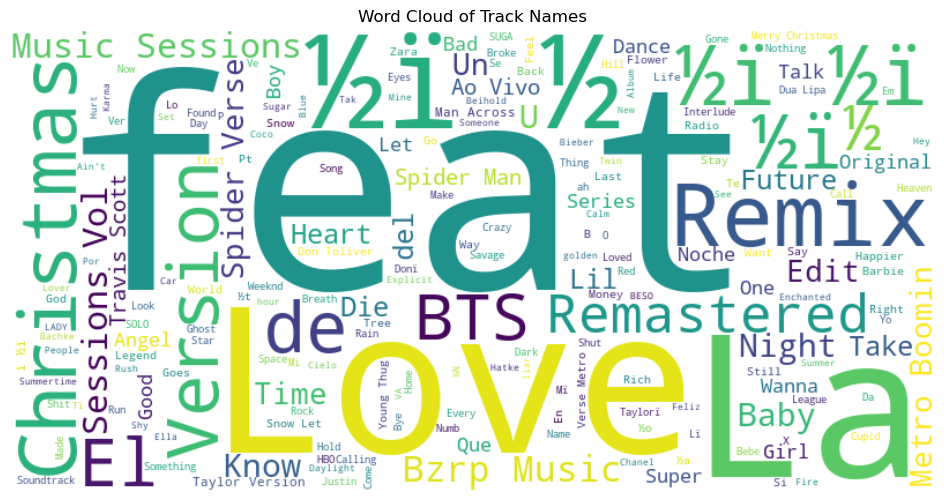

In [36]:
plt.figure(figsize=(12, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud of Track Names')
plt.show()